# Data Understanding – AI4I 2020 Predictive Maintenance Dataset

## Objective
This notebook performs initial inspection of the AI4I 2020 dataset to understand structure, variable types, data quality, and the distribution of the target variable (machine failure) prior to EDA and modeling.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (8, 5)


In [13]:
import sys
from pathlib import Path

PROJECT_ROOT = Path().resolve().parent  # go from /notebook → project root
sys.path.append(str(PROJECT_ROOT / "src"))

print(PROJECT_ROOT)
print(PROJECT_ROOT / "src")

D:\Data Analytics\TERM 5\Industrial Machine Prediction Capstone Project\Capstone_Project_Damo-699
D:\Data Analytics\TERM 5\Industrial Machine Prediction Capstone Project\Capstone_Project_Damo-699\src


In [14]:
from data_loader import load_cleaned_data, get_basic_info

In [15]:
df = load_cleaned_data()
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [16]:
df.shape


(10000, 14)

In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [18]:
df.isna().sum().sort_values(ascending=False)


UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [19]:
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UDI,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
Product ID,10000,10000,M14860,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10000,3,L,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air temperature [K],10000.0,NaN,NaN,NaN,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,NaN,NaN,NaN,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,NaN,NaN,NaN,1538.7761,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,NaN,NaN,NaN,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear [min],10000.0,NaN,NaN,NaN,107.951,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,NaN,NaN,NaN,0.0339,0.180981,0.0,0.0,0.0,0.0,1.0
TWF,10000.0,NaN,NaN,NaN,0.0046,0.067671,0.0,0.0,0.0,0.0,1.0


In [20]:
df["Machine failure"].value_counts()


Machine failure
0    9661
1     339
Name: count, dtype: int64

In [21]:
failure_rate = df["Machine failure"].mean()
failure_rate


np.float64(0.0339)

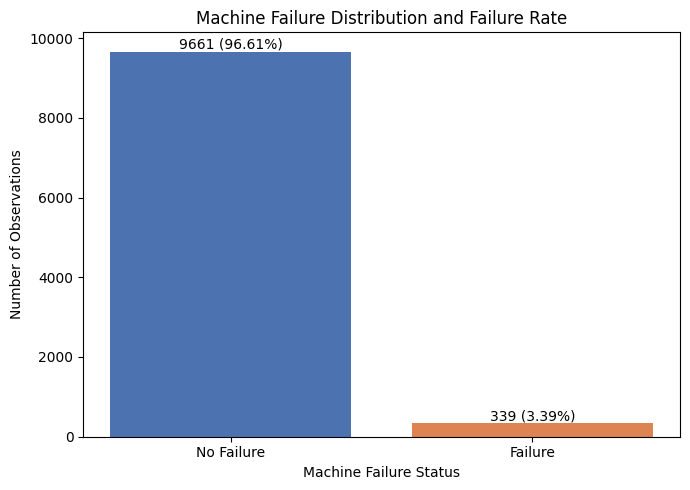

In [22]:
# Calculate counts and percentages
counts = df["Machine failure"].value_counts().sort_index()
percentages = counts / counts.sum() * 100

# Define colors (neutral + alert)
colors = ["#4C72B0", "#DD8452"]  # blue = no failure, orange = failure

plt.figure(figsize=(7, 5))
bars = plt.bar(
    ["No Failure", "Failure"],
    counts,
    color=colors
)

# Annotate bars
for bar, count, pct in zip(bars, counts, percentages):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{count} ({pct:.2f}%)",
        ha="center",
        va="bottom"
    )

plt.title("Machine Failure Distribution and Failure Rate")
plt.xlabel("Machine Failure Status")
plt.ylabel("Number of Observations")
plt.tight_layout()
plt.show()


## Key Observations
- Machine failure events represent a very small proportion of total observations, confirming a **highly imbalanced dataset**.
- This imbalance reflects real-world industrial environments, where failures are rare but costly.
- As a result, predictive models should prioritize **failure detection capability (recall)** over overall accuracy.
